In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "Dataset/"

CATEGORIES = ["DorsiFlexion of Foot","DorsiFlexion of Foot","NECK Exercise","PlanterFlexion of Foot","Trunk Extension","Trunk Flexion","Wrist Extension","Wrist Flexion"]


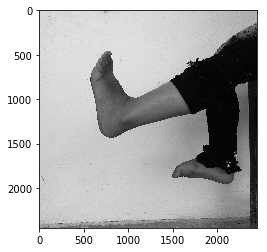

In [3]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  # 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray') 
        plt.show()  

        break  
    break  

In [4]:
print(img_array)


[[190 186 186 ... 149 153 158]
 [187 187 190 ... 154 155 158]
 [190 189 191 ... 158 156 158]
 ...
 [102 112 109 ...   8  19  21]
 [ 91  96  95 ...   1  13  20]
 [ 94  99  96 ...   0   8  18]]


In [5]:
print(img_array.shape)


(2448, 2448)


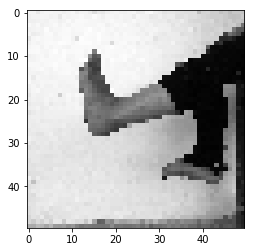

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

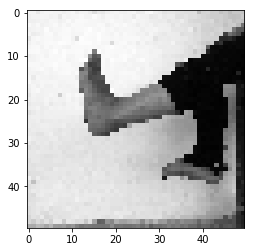

In [7]:

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████| 164/164 [00:11<00:00, 14.64it/s]


1609


In [9]:
import random

random.shuffle(training_data)

In [10]:

for sample in training_data[:10]:
    print(sample[1])

3
6
0
0
4
3
0
6
0
3


In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


[[[[ 98]
   [ 94]
   [ 96]
   ...
   [117]
   [118]
   [119]]

  [[ 96]
   [ 93]
   [ 96]
   ...
   [113]
   [114]
   [116]]

  [[ 95]
   [ 98]
   [ 98]
   ...
   [115]
   [117]
   [119]]

  ...

  [[ 99]
   [100]
   [102]
   ...
   [166]
   [164]
   [172]]

  [[102]
   [ 95]
   [ 98]
   ...
   [167]
   [175]
   [176]]

  [[103]
   [ 97]
   [ 99]
   ...
   [173]
   [157]
   [169]]]]


In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

C:\Users\Masroor shah\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [15]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))


model.add(Dense(9))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=12, validation_split=0.3)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1126 samples, validate on 483 samples
Epoch 1/12
1126/1126 [==============================] - ETA: 1:23 - loss: 2.2164 - acc: 0.062 - ETA: 58s - loss: 2.4508 - acc: 0.109 - ETA: 49s - loss: 2.4163 - acc: 0.15 - ETA: 44s - loss: 2.3714 - acc: 0.13 - ETA: 40s - loss: 2.3301 - acc: 0.13 - ETA: 37s - loss: 2.2981 - acc: 0.15 - ETA: 35s - loss: 2.2672 - acc: 0.15 - ETA: 33s - loss: 2.2367 - acc: 0.17 - ETA: 31s - loss: 2.2080 - acc: 0.18 - ETA: 29s - loss: 2.1870 - acc: 0.19 - ETA: 28s - loss: 2.1847 - acc: 0.18 - ETA: 26s - loss: 2.1703 - acc: 0.18 - ETA: 25s - loss: 2.1537 - acc: 0.18 - ETA: 24s - loss: 2.1394 - acc: 0.19 - ETA: 22s - loss: 2.1300 - acc: 0.18 - ETA: 21s - loss: 2.1263 - acc: 0.17 - ETA: 20s - loss: 2.1148 - acc: 0.17 - ETA: 19s - loss: 2.1070 - acc: 0.18 - ETA: 18s - loss: 2.0970 - acc: 0.18 - ETA: 16s - loss: 2.0891 - acc: 0.18 - ETA: 15s - loss:

1126/1126 [==============================] - ETA: 37s - loss: 0.0588 - acc: 1.00 - ETA: 39s - loss: 0.0672 - acc: 1.00 - ETA: 51s - loss: 0.0807 - acc: 0.98 - ETA: 46s - loss: 0.0851 - acc: 0.99 - ETA: 42s - loss: 0.0952 - acc: 0.98 - ETA: 47s - loss: 0.0985 - acc: 0.98 - ETA: 43s - loss: 0.0993 - acc: 0.98 - ETA: 40s - loss: 0.0949 - acc: 0.98 - ETA: 40s - loss: 0.0930 - acc: 0.98 - ETA: 39s - loss: 0.0874 - acc: 0.98 - ETA: 36s - loss: 0.0853 - acc: 0.98 - ETA: 34s - loss: 0.0802 - acc: 0.98 - ETA: 34s - loss: 0.0773 - acc: 0.99 - ETA: 32s - loss: 0.0765 - acc: 0.99 - ETA: 30s - loss: 0.0758 - acc: 0.99 - ETA: 30s - loss: 0.0747 - acc: 0.99 - ETA: 28s - loss: 0.0762 - acc: 0.99 - ETA: 26s - loss: 0.0773 - acc: 0.99 - ETA: 25s - loss: 0.0775 - acc: 0.99 - ETA: 23s - loss: 0.0768 - acc: 0.99 - ETA: 21s - loss: 0.0765 - acc: 0.99 - ETA: 20s - loss: 0.0749 - acc: 0.99 - ETA: 19s - loss: 0.0741 - acc: 0.99 - ETA: 17s - loss: 0.0744 - acc: 0.99 - ETA: 15s - loss: 0.0742 - acc: 0.99 - ETA: 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

In [17]:
predictions = model.predict_classes(X)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 6, 7, 0, 0, 3, 6, 4, 4, 0, 2, 3, 0, 4, 3], dtype=int64)

In [18]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y, predictions, target_names = ["DorsiFlexion of Foot","NECK Exercise","PlanterFlexion of Foot","Trunk Extension","Trunk Flexion","Wrist Extension","Wrist Flexion"]))

                        precision    recall  f1-score   support

  DorsiFlexion of Foot       0.93      0.99      0.96       416
         NECK Exercise       0.87      0.87      0.87       165
PlanterFlexion of Foot       0.91      0.86      0.89       211
       Trunk Extension       0.93      0.81      0.86       168
         Trunk Flexion       0.95      0.84      0.89       160
       Wrist Extension       0.85      0.90      0.88       325
         Wrist Flexion       0.84      0.90      0.87       164

             micro avg       0.90      0.90      0.90      1609
             macro avg       0.90      0.88      0.89      1609
          weighted avg       0.90      0.90      0.90      1609



In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print(accuracy_score(y, predictions))

0.8986948415164698


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
print(confusion_matrix(y, predictions))

[[410   0   0   2   0   0   4]
 [  1 143   3   4   2   5   7]
 [ 10   5 181   1   2   9   3]
 [  1   6   1 136   0  19   5]
 [  5   6   2   0 135   8   4]
 [ 11   3   9   3   1 294   4]
 [  2   1   2   1   2   9 147]]


In [23]:
cm = confusion_matrix(y, predictions)

In [24]:
import seaborn as sns

In [25]:
import pandas as pd

In [27]:
cm = pd.DataFrame(cm , index = ['0','1',"2","3","4","5","6"] , columns = ['0','1',"2","3","4","5","6"])

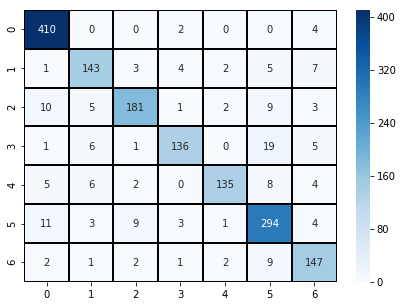

In [28]:
plt.figure(figsize = (7,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [29]:
correct = np.nonzero(predictions == y)[0]
incorrect = np.nonzero(predictions != y)[0]

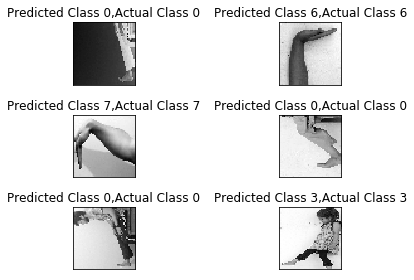

In [30]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[c].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1

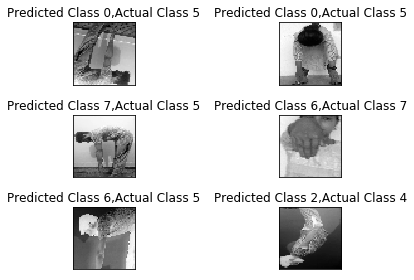

In [31]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[c].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1